In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import os
import pandas as pd

In [2]:
# def pad_truncate_spectrogram(spectrogram, max_frames):
#     """Pad or truncate the spectrogram to have a fixed number of time frames."""
#     if spectrogram.shape[1] < max_frames:
#         pad_width = max_frames - spectrogram.shape[1]
#         spectrogram = np.pad(spectrogram, ((0,0), (0, pad_width)), mode='constant')
#     else:
#         spectrogram = spectrogram[:, :max_frames]
#     return spectrogram

In [3]:
def wav_to_mel_spectrogram_array(wav_path, n_fft=2048, hop_length=512, n_mels=128):
    """
    Converts a WAV audio file to a Mel spectrogram array (in dB scale).

    Parameters:
    - wav_path (str): Path to the input WAV file.
    - n_fft (int): Number of samples per FFT.
    - hop_length (int): Number of samples between successive frames.
    - n_mels (int): Number of Mel bands to generate.

    Returns:
    - mel_spec_db (np.ndarray): The Mel spectrogram in decibel scale.
    - sr (int): Sampling rate of the audio file.
    """
    # Load the audio file; sr=None keeps the original sampling rate
    y, sr = librosa.load(wav_path, sr=None)
    
    # Compute the Mel-scaled spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, 
                                              hop_length=hop_length, n_mels=n_mels)
    
    # Convert to dB scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    return mel_spec_db, sr

def batch_process_wav_files_to_arrays(input_dir, n_fft=2048, hop_length=512, n_mels=128):
    """
    Processes all WAV files in the input directory and returns their spectrograms as NumPy arrays.

    Parameters:
    - input_dir (str): Directory containing WAV files.
    - n_fft (int): FFT window size.
    - hop_length (int): Hop length between frames.

    Returns:
    - spectrograms (dict): Dictionary where keys are filenames and values are tuples (spectrogram array, sampling rate).
    """
    spectrograms = {}
    
    # Process each WAV file in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith('.wav'):
            wav_path = os.path.join(input_dir, filename)
            spectrogram, sr = wav_to_mel_spectrogram_array(wav_path, n_fft, hop_length, n_mels)
            spectrograms[filename] = (spectrogram, sr)
            print(f"Processed {filename}")
    
    return spectrograms

# Example usage:
# spectrogram_dict = batch_process_wav_files_to_arrays('path/to/wav_files')
# Now, spectrogram_dict contains the spectrogram arrays for each WAV file.

spectrogram_dict = batch_process_wav_files_to_arrays(input_dir=r'..\data\WAV_Groningen_1\WAV_Groningen_1\Noorderplantsoen')


Processed NP101.wav
Processed NP102.1.wav
Processed NP102.wav
Processed NP106.wav
Processed NP107.wav
Processed NP108.wav
Processed NP109.wav
Processed NP110.wav
Processed NP111.wav
Processed NP112.wav
Processed NP113.wav
Processed NP114.wav
Processed NP116.wav
Processed NP117.wav
Processed NP118.wav
Processed NP119.wav
Processed NP120.wav
Processed NP123.wav
Processed NP125.hdf.wav
Processed NP126.wav
Processed NP127.wav
Processed NP128.wav
Processed NP129.wav
Processed NP131.wav
Processed NP132.wav
Processed NP133.wav
Processed NP134.wav
Processed NP135.wav
Processed NP136.wav
Processed NP138.wav
Processed NP139.wav
Processed NP140.wav
Processed NP141.wav
Processed NP142.wav
Processed NP143.wav
Processed NP144.wav
Processed NP146.wav
Processed NP147.wav
Processed NP148.wav
Processed NP149.wav
Processed NP150.wav
Processed NP151.wav
Processed NP152.wav
Processed NP153.wav
Processed NP154.wav
Processed NP155.wav
Processed NP156.wav
Processed NP157.wav
Processed NP158.wav
Processed NP16

In [4]:
print(spectrogram_dict['NP101.wav'][0])

[[-17.99561  -14.50788  -18.61945  ... -25.160034 -26.796688 -31.035172]
 [-16.783619 -12.935746 -18.835697 ... -25.3755   -27.178032 -29.33009 ]
 [-20.839985 -17.413712 -15.413377 ... -24.365097 -27.17545  -30.958145]
 ...
 [-78.3366   -75.378555 -76.10595  ... -77.75245  -77.57392  -77.01674 ]
 [-78.60328  -76.281555 -76.85732  ... -75.89186  -76.42281  -76.11891 ]
 [-78.32219  -75.82534  -76.51097  ... -76.51168  -76.2168   -77.37608 ]]


In [ ]:
rows = []
for filename, (spectrogram, sr) in spectrogram_dict.items():
    # print(spectrogram)
    rows.append({'filename': filename, 'array': spectrogram, 'sr': sr})

result_df = pd.DataFrame(rows)
display(result_df)
# result_df.to_csv(r'..\data\WAV_Groningen_1\WAV_Groningen_1\csv\mel_spectrogram.csv', index=False)

,filename,array,sr
0,NP101.wav,"[[-17.99561, -14.50788, -18.61945, -18.038902,...",48000
1,NP102.1.wav,"[[-32.91297, -17.561249, -12.185563, -14.55463...",48000
2,NP102.wav,"[[-32.91297, -17.561249, -12.185563, -14.55463...",48000
3,NP106.wav,"[[-12.616985, -9.973314, -9.506258, -9.620905,...",48000
4,NP107.wav,"[[-15.77356, -13.234295, -16.36142, -9.547462,...",48000
5,NP108.wav,"[[-8.713261, -6.2043743, -7.1559086, -6.364979...",48000
6,NP109.wav,"[[-9.1104965, -4.8507175, -12.107159, -12.3829...",48000
7,NP110.wav,"[[-33.331493, -33.39356, -27.587978, -29.72372...",48000
8,NP111.wav,"[[-13.717687, -8.833741, -7.0140123, -8.561801...",48000
9,NP112.wav,"[[-20.650944, -18.33166, -17.870192, -17.03033...",48000


48000


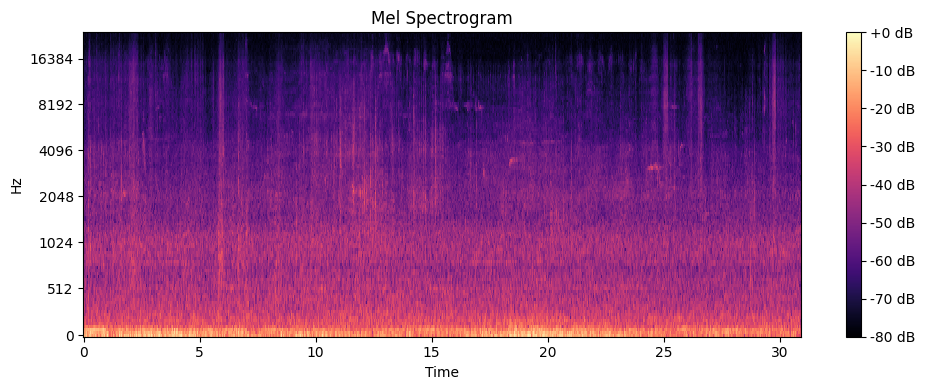

In [8]:
mel_spec_db = spectrogram_dict['NP101.wav'][0]
sr = spectrogram_dict['NP101.wav'][1]
print(sr)
hop_length = 512
# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()